<a href="https://colab.research.google.com/github/dtngx/ml_logbook_week3/blob/main/Exercises_Revision_for_Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

# **Machine Learning** #

Level-7

**Week 3 Block 2 Seminar Exercises**

# **Part 1** #

**Exercises on plots**

Please feel free to check the examples/exercises from last week, also the omnipotent online resources

In [1]:
# Importing drive method from colab for accessing google drive
from google.colab import drive

# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Load packages
#
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Displays the plots for us
#
%matplotlib inline

In [9]:
## Define a logistic function
#
import numpy as np

def logistic(z: np.ndarray, a: float, b: float) -> np.ndarray:
    """ Compute logistic function
      Inputs:
         a: exponential parameter
         b: exponential prefactor
         z: numpy array; domain
      Outputs:
         f: numpy array of floats, logistic function
    """
    
    den = 1.0 + b * np.exp(-a * z)
    return 1.0 / den

def stretch_tanh(z: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """ Compute stretched hyperbolic tangent
      Inputs:
         a: horizontal stretch parameter (a>1 implies a horizontal squish)
         b: vertical stretch parameter
         c: vertical shift parameter
         z: numpy array; domain
      Outputs:
         g: numpy array of floats, stretched tanh
    """
    return b * np.tanh(a * z) + c

def relu(z: np.ndarray, eps: float = 0.01) -> np.ndarray:
    """ Compute rectificed linear unit
      Inputs:
         eps: small positive parameter
         z: numpy array; domain
      Outputs:
         h: numpy array; relu
    """
    return np.fmax(z, eps * z)

In [13]:
## Equally spaced grid of 100 pts between -5 and 5
#
x = np.linspace(-5.0, 5.0, 100) 

## Generate data
#
f = logistic(x, 1.0, 1.0) 
g = stretch_tanh(x, 1.0, 1.0, 0.0)
h = relu(x, 0.01)

## Exercise 2.1
Do the following:

Make a figure with the logistic function (logistic), hyperbolic tangent (stretch_tanh), and rectified linear unit (relu). 
Use different line styles for each plot
Put a legend on your figure


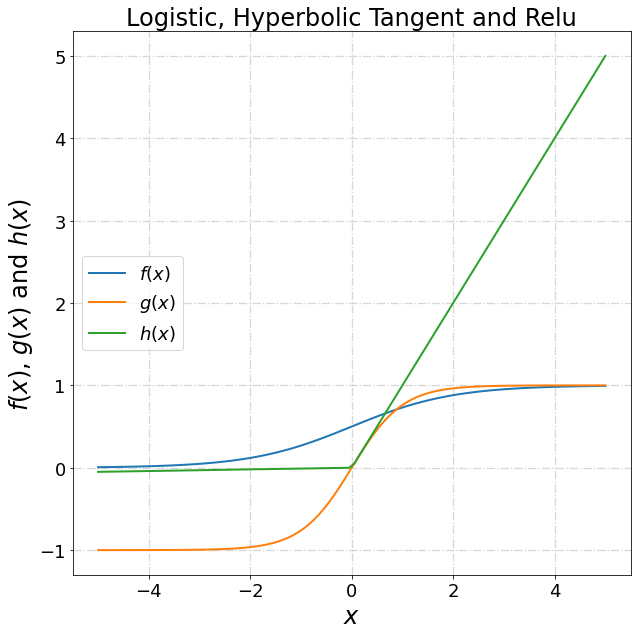

In [118]:
## get the figure and ax objects
fig, ax = plt.subplots(1,1, figsize=(10, 10))

## plotting of the functions
functions = [f, g, h]

for function in functions:
        ax.plot(x, function, lw=2)

## customizing the labels
ax.set_xlabel(r"$x$", fontsize=24)
ax.set_ylabel(r"$f(x)$, $g(x)$ and $h(x)$", fontsize=24)
ax.set_title("Logistic, Hyperbolic Tangent and Relu", fontsize=24)
ax.tick_params(labelsize=18)

## customizing the grid
ax.grid(True, lw=1.3, ls="-.", alpha=0.5)

## adding the legend
ax.legend(["$f(x)$", "$g(x)$", "$h(x)$"], loc="center left", ncol=1, fontsize=18)

## Exercise 2.2
These figures from Exercise 1 look nice in the plot and it makes sense for comparison. Now let's put the 3 different figures in separate plots.

Make a separate plot for each figure and line them up on the same row.

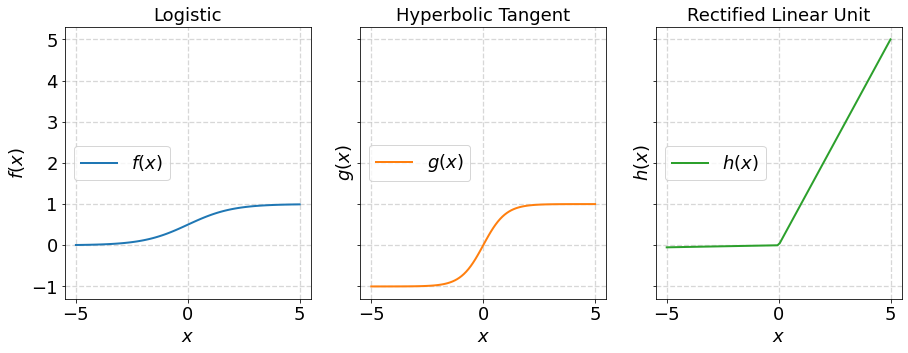

In [126]:
## get the figure and ax objects
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)

## setting the parameters
functions = [f, g, h]
valnames = ["$f(x)$", "$g(x)$", "$h(x)$"]
titles = ["Logistic", "Hyperbolic Tangent", "Rectified Linear Unit"]
genSize = 18
colors = ["tab:blue", "tab:orange", "tab:green"]

##plotting and customizing labels
for (function, ax, name, title, color) in zip(functions, axes, valnames, titles, colors):
        ax.plot(x, function, color=color, lw=2)

        ## customizing the labels:
        ax.set_xlabel(r"$x$", fontsize=genSize)
        ax.set_ylabel(name,fontsize=genSize)
        ax.set_title(title, fontsize=genSize)
        ax.tick_params(labelsize=genSize)

        ## customizing the grid
        ax.grid(True, lw=1.3, ls="--", alpha=0.5)

        ## adding the legend
        ax.legend([name], loc="center left", ncol=1, fontsize=18)

# **Part 2**

**k -nearest neighbors**

Sklearn's regressor is called sklearn.neighbors.KNeighborsRegressor. Its main parameter is the number of nearest neighbors. There are other parameters such as the distance metric (default for 2 order is the Euclidean distance). For a list of all the parameters see the Sklearn kNN Regressor Documentation.

Let's use  5  nearest neighbors.

In [150]:
## Import the library
#
from sklearn.neighbors import KNeighborsRegressor

In [151]:
## Set number of neighbors
#
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [152]:
dfcars = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UWL/MSc-ML/mtcars.csv')
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [153]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [154]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

In [155]:
## Fit the regressor - make sure your numpy arrays are the right shape
#
knnreg.fit(X_train, y_train)

## Evaluate the outcome on the train set using R^2
#
r2_train = knnreg.score(X_train, y_train)

## Print results
#
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.87181


In [156]:
knnreg.predict(X_test)

array([20.14, 14.  , 15.3 , 26.3 , 19.56, 17.06, 16.88])

## Exercise 2.3

Calculate and print the $R^{2}$ score on the test set

In [157]:
r2_test = knnreg.score(X_test, y_test)
print(f"kNN model with {k} neighbors gives R^2 on the test set: {r2_test:.5}")

kNN model with 5 neighbors gives R^2 on the test set: 0.69922


Now let's vary the number of neighbors and see what we get.

In [158]:
## Make our lives easy by storing the different regressors in a dictionary
#
regdict = {}

## Make our lives easier by entering the k values from a list
#
k_list = [1, 2, 4, 15]

## Do a bunch of KNN regressions
#
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    
    # Store the regressors in a dictionary
    #
    regdict[k] = knnreg 

## Print the dictionary to see what we have
#
regdict

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 2: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'),
 4: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform'),
 15: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')}

Now let's plot all the k values in same plot.

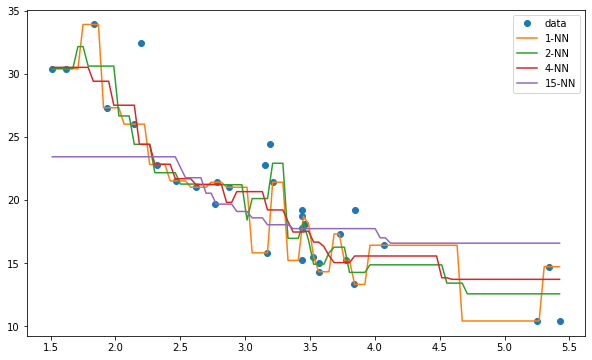

In [159]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

Now let's look at the scores on the training set.

Text(0, 0.5, '$R^{2}$')

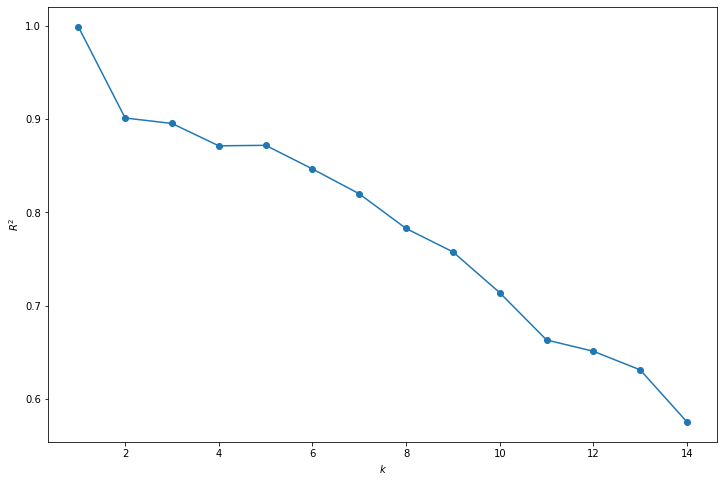

In [160]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

### Exercise 2.4

* Why do we get a perfect $R^2$ at k=1 for the training set?
* Make the same plot as above on the *test* set.
* What is the best $k$?

Text(0, 0.5, '$R^{2}$')

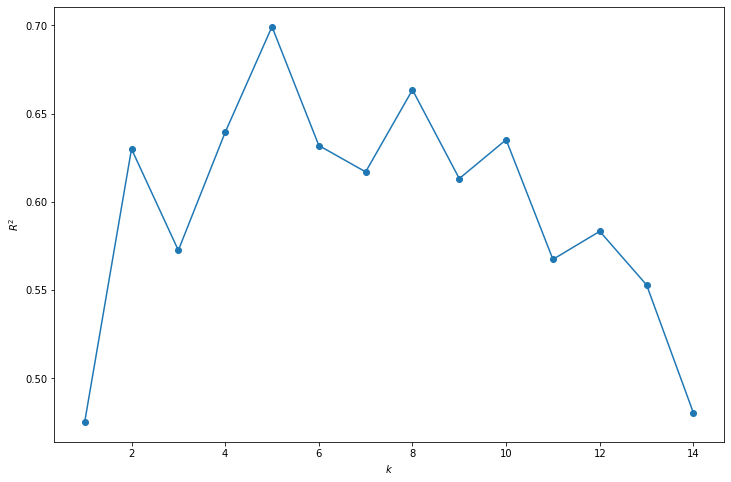

In [169]:
## Why do we get a perfect  𝑅2  at k=1 for the training set?

  ## We get R^2 at k=1 because we used the same set of data first to train the model and then to calculate R^2. 
  ## This means, as long as k=1 every value is just checked against itself. What we should do is using the test data.

## Make the same plot as above on the test set.

ks = range(1, 15) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
  # Create KNN model
  knnreg = KNeighborsRegressor(n_neighbors=k)

  # Fit the model to training data
  knnreg.fit(X_train, y_train)

  # Calculate R^2 score this time against the test set
  score_test = knnreg.score(X_test, y_test) 
  scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,"o-")
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$R^{2}$")

## What is the best k?

  ## As we see in this plot, the best k for this model is 5 as it produces the R^2 value closest to 1.
  ## This happens to be the R^2 value we initially calculated in Exercise 2.3: It equals 0.69922.